### Data source: The COVID Tracking Project API

In [39]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

### I will look at US historical data to find trends in postive and negative cases based on total tests conducted.

In [8]:
us_url = "https://covidtracking.com/api/us/daily"
data = requests.get(url=us_url)
json_data = data.json()

In [11]:
df = pd.DataFrame(json_data)
df 

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200412,56,551826,2254066.0,16419.0,51413.0,61201.0,13917.0,1455.0,5986.0,...,21919,61201.0,2822311,2805892,2805892,1564.0,2652.0,111243.0,28983.0,140226.0
1,20200411,56,522843,2142823.0,16593.0,51409.0,58549.0,13563.0,1228.0,5978.0,...,20355,58549.0,2682259,2665666,2665666,1867.0,2207.0,106793.0,29591.0,136384.0
2,20200410,56,493252,2036030.0,17435.0,48468.0,56342.0,12698.0,1185.0,5937.0,...,18488,56342.0,2546717,2529282,2529282,2064.0,4291.0,119310.0,34617.0,153927.0
3,20200409,56,458635,1916720.0,17622.0,46676.0,52051.0,12254.0,924.0,5794.0,...,16424,52051.0,2392977,2375355,2375355,1877.0,3134.0,128443.0,34346.0,162789.0
4,20200408,56,424289,1788277.0,17219.0,41111.0,48917.0,9932.0,1013.0,4131.0,...,14547,48917.0,2229785,2212566,2212566,1901.0,3417.0,109403.0,30133.0,139536.0
5,20200407,56,394156,1678874.0,16548.0,39677.0,45500.0,9875.0,889.0,4076.0,...,12646,45500.0,2089578,2073030,2073030,1926.0,2302.0,117662.0,30437.0,148099.0
6,20200406,56,363719,1561212.0,17283.0,32210.0,43198.0,6943.0,814.0,2961.0,...,10720,43198.0,1942214,1924931,1924931,1166.0,2975.0,120496.0,28752.0,149248.0
7,20200405,56,334967,1440716.0,17303.0,28490.0,40223.0,5677.0,760.0,652.0,...,9554,40223.0,1792986,1775683,1775683,1175.0,2556.0,96629.0,25974.0,122603.0
8,20200404,56,308993,1344087.0,15569.0,26948.0,37667.0,5383.0,554.0,656.0,...,8379,37667.0,1668649,1653080,1653080,1353.0,4166.0,195732.0,33536.0,229268.0
9,20200403,56,275457,1148355.0,61976.0,23825.0,33501.0,4811.0,486.0,605.0,...,7026,33501.0,1485788,1423812,1423812,1191.0,3303.0,99957.0,32054.0,132011.0


### Question: As the number of tests results increase, what is the relationship to the increase in positive cases and negative cases?

In [44]:
# grab the correct columns from the dataframe and store in numpy array
positve_increase = np.array(df['positiveIncrease'])[::-1]
negative_increase = np.array(df['negativeIncrease'])[::-1]
totalTestResultsIncrease = np.array(df['totalTestResultsIncrease'])[::-1]
date_array = np.array(df['date'])[::-1]

In [68]:
# date formatting manipulation for x-axis 
date_array = [str(d) for d in date_array] # convert integer dates to string format
formatted_dates = [dt.datetime.strptime(d, '%Y%m%d').date() for d in date_array] # convert to python datetime objects

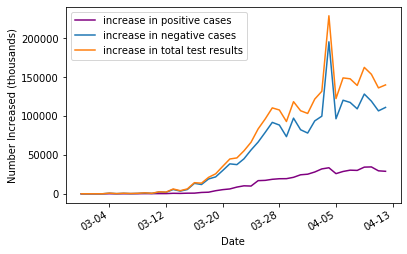

In [70]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=8))
plt.plot(formatted_dates, positve_increase, c="purple", label="increase in positive cases")
plt.plot(formatted_dates, negative_increase, label="increase in negative cases")
plt.plot(formatted_dates, totalTestResultsIncrease, label="increase in total test results")
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Number Increased (thousands)")
plt.legend()
plt.show()